## <font color = 'green' id = "section" > Notebook 1: Apprentissage automatique, Classification</font>

# <font color="blue">Sommaire</font>
1. [Importation des librairies](#section_1)    
2. [Lecture du Dataset](#section_2) 
3. [Inventaire des valeurs manquantes](#section_3)         
4. [Selection variables pertienentes](#section_4)
5. [Description statistique et distribution](#section_5)  
6. [TARGET: Synthese_eval_sanit](#section_6) 
7. [Features transformation: Adresse_2_UA](#section_7) 
8. [Exploration de données](#section_8) 
   



# <font color ='red' id = 'section_1' > 1. Importation des librairies </font>

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import ast
import scipy as sp
import time
import pickle
from datetime import datetime
#-------------------------------------------------------------------
from tqdm import tqdm
import gc
#------------------------------------------------------------------
import plotly.graph_objs as go
import plotly.express as px
from textwrap import wrap
#-------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
#------------------------------------------
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

# Checklist

## Description
La publication des résultats des contrôles sanitaires dans le secteur alimentaire (**restaurants, cantines, abattoirs, etc.**) est une attente légitime des citoyens qui participe à l’amélioration de la confiance du consommateur. Prévue par la loi d’Avenir pour l’agriculture, l’alimentation et la forêt, du 13 octobre 2014, cette mesure s’inscrit dans une évolution vers une plus grande transparence de l’action de l’État.


**Quels sont secteurs d’activité concernés ?**

Il s’agit de rendre public le résultat des contrôles officiels en sécurité sanitaire des aliments réalisés dans tous les établissements de la chaîne alimentaire : **abattoirs, commerces de détail (métiers de bouche, restaurants, supermarchés, marchés, vente à la ferme, etc.), restaurants collectifs et établissements agroalimentaires.**


# Objectif

Notre objectif majeur dans ce projet en particulier ce notebbok 1 comprend les étapes suivantes: 
 
**1.** *Nettoyage des données*

**2.** *Feature engineering*

**3.** *Explorattion rapide*


# Description des données
Lien 1: https://www.data.gouv.fr/fr/pages/thematiques-a-la-une/

Lien vers les données: https://www.data.gouv.fr/fr/datasets/resultats-des-controles-officiels-sanitaires-dispositif-dinformation-alimconfiance/


# <font color="red" id="section_2"> 2. Chargement, lecture, apercu et infos des données </font>

In [4]:
data = pd.read_csv("export_alimconfiance.csv", sep=';',encoding = 'utf-8')

In [5]:
display(data.head(2))
display(data.tail(2))

APP_Libelle_etablissement           SIRET  \
0  DE CERGY NEUVILLE (SYND MIXTE D'ETUDE AMENA GE...  25950062700015   
1  CODIPEX (CONSORTIUM EUROPE ECHANG COMMERC INTE...  30009044600034   

      Adresse_2_UA Code_postal Libelle_commune Numero_inspection  \
0  29 R DES ETANGS       95800           CERGY          16527453   
1     14 AV SOMMER       92160          ANTONY          16660788   

             Date_inspection APP_Libelle_activite_etablissement  \
0  2022-07-13T02:00:00+02:00                                  _   
1  2022-09-07T02:00:00+02:00                                  _   

  Synthese_eval_sanit Agrement              geores filtre ods_type_activite  
0         A améliorer      NaN                 NaN    NaN            Autres  
1   Très satisfaisant      NaN  48.732041,2.305533    NaN            Autres

APP_Libelle_etablissement           SIRET           Adresse_2_UA  \
34175  CENTRE HOSPITALIER DU FOREZ  20003493200018    av des mots du soir   
34176            GAEC DES THIBAUDS  53903833100010  375 CHE DES TERRAIONS   

      Code_postal Libelle_commune Numero_inspection  \
34175       42600      Montbrison       22-068033-1   
34176       26310          Miscon       22-001364-1   

                 Date_inspection           APP_Libelle_activite_etablissement  \
34175  2022-08-31T02:00:00+02:00                      Restauration collective   
34176  2022-11-30T01:00:00+01:00  Transformation de lait ou produits laitiers   

      Synthese_eval_sanit  Agrement              geores  \
34175        Satisfaisant  42147341  45.612674,4.046673   
34176   Très satisfaisant  26186081    44.6289,5.520219   

                        filtre          ods_type_activite  
34175  Restauration collective                     Autres  
34176                      NaN  Lait et produits laitiers

In [6]:
data.shape

(34177, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34177 entries, 0 to 34176
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   APP_Libelle_etablissement           34177 non-null  object
 1   SIRET                               34177 non-null  object
 2   Adresse_2_UA                        33691 non-null  object
 3   Code_postal                         34177 non-null  object
 4   Libelle_commune                     34177 non-null  object
 5   Numero_inspection                   34177 non-null  object
 6   Date_inspection                     34177 non-null  object
 7   APP_Libelle_activite_etablissement  34177 non-null  object
 8   Synthese_eval_sanit                 34177 non-null  object
 9   Agrement                            9591 non-null   object
 10  geores                              33445 non-null  object
 11  filtre                              24967 non-null  ob

In [8]:
data.duplicated().sum()

0

## <font color="red" id="section_3" > 3. Inventaire des valeurs manquantes

In [9]:
def rech_nan(data):
    dic_var = {}
    for col in data.columns:
        
        dic_var[col] = []
        dic_var[col].append((data[col].notna().sum()/(data.shape[0]))*100)
        dic_var[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data = dic_var, orient = 'index', 
                            columns = ['Taux_remplissage', 'Valeurs manquantes']).sort_values(by = 'Taux_remplissage',
                                                                                              ascending =False )

In [10]:
df_nan = rech_nan(data)
df_nan

Taux_remplissage  Valeurs manquantes
APP_Libelle_etablissement                 100.000000                   0
SIRET                                     100.000000                   0
Code_postal                               100.000000                   0
Libelle_commune                           100.000000                   0
Numero_inspection                         100.000000                   0
Date_inspection                           100.000000                   0
APP_Libelle_activite_etablissement        100.000000                   0
Synthese_eval_sanit                       100.000000                   0
ods_type_activite                         100.000000                   0
Adresse_2_UA                               98.577991                 486
geores                                     97.858209                 732
filtre                                     73.052053                9210
Agrement                                   28.062732               24586

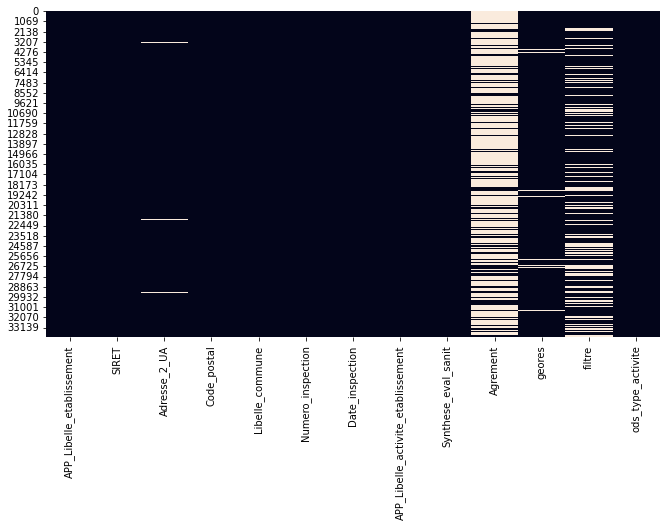

In [11]:
plt.figure(figsize = (11,6))
sns.heatmap(data.isna(), cbar = False)
plt.show()

# Commentaire: 
Nous allons supprimer '**SIRET** et **Agrement** qui nous sont d'aucune utilité.

In [12]:
data.drop( ["SIRET", "Agrement"], axis = 1, inplace = True)

In [13]:
data.tail(2)

APP_Libelle_etablissement           Adresse_2_UA Code_postal  \
34175  CENTRE HOSPITALIER DU FOREZ    av des mots du soir       42600   
34176            GAEC DES THIBAUDS  375 CHE DES TERRAIONS       26310   

      Libelle_commune Numero_inspection            Date_inspection  \
34175      Montbrison       22-068033-1  2022-08-31T02:00:00+02:00   
34176          Miscon       22-001364-1  2022-11-30T01:00:00+01:00   

                APP_Libelle_activite_etablissement Synthese_eval_sanit  \
34175                      Restauration collective        Satisfaisant   
34176  Transformation de lait ou produits laitiers   Très satisfaisant   

                   geores                   filtre          ods_type_activite  
34175  45.612674,4.046673  Restauration collective                     Autres  
34176    44.6289,5.520219                      NaN  Lait et produits laitiers

In [14]:
data.isna().sum()

APP_Libelle_etablissement                0
Adresse_2_UA                           486
Code_postal                              0
Libelle_commune                          0
Numero_inspection                        0
Date_inspection                          0
APP_Libelle_activite_etablissement       0
Synthese_eval_sanit                      0
geores                                 732
filtre                                9210
ods_type_activite                        0
dtype: int64

## <font color="red" id="section_3_1" > 3.1 Traitement valeurs manquantes : Geores
Nous allons d'abord éclater la variable **Geores** en **Longitude** et **Latitude** ensuite imputer automatiquement les valeurs manquantes.

In [15]:
data.geores

0                       NaN
1        48.732041,2.305533
2        49.017271,2.380653
3        48.868487,2.227684
4        45.762926,4.832648
                ...        
34172    46.299554,4.897724
34173      48.835253,2.3169
34174    46.553788,5.671371
34175    45.612674,4.046673
34176      44.6289,5.520219
Name: geores, Length: 34177, dtype: object

In [16]:
data_geo_notna =  data.loc[data['geores'].notna(), 'geores']

In [17]:
data_geo_notna.head()

1    48.732041,2.305533
2    49.017271,2.380653
3    48.868487,2.227684
4    45.762926,4.832648
5    48.703268,1.855354
Name: geores, dtype: object

In [18]:
data_geo_notna.shape

(33445,)

In [19]:
data_geo_notna = pd.DataFrame(data_geo_notna)
data_geo_notna.columns = ['Geores']
data_geo_notna.head()

Geores
1  48.732041,2.305533
2  49.017271,2.380653
3  48.868487,2.227684
4  45.762926,4.832648
5  48.703268,1.855354

In [20]:
for i in   tqdm(data_geo_notna.index):
    data_geo_notna['Geores'][i] = data_geo_notna['Geores'][i].split(',')

100%|██████████| 33445/33445 [00:04<00:00, 7940.60it/s]


In [21]:
def lat_long(data):
    lat_list = []
    long_list = []
    for j in  tqdm(data.index):
        lat_list.append(data["Geores"][j][0])
        long_list.append(data["Geores"][j][1])
    #creation de variable longitude et latitude
    data["Latitude"] = lat_list
    data['Longitude'] = long_list
    #Changement de type en float
    data['Latitude'] = data['Latitude'].astype('float')
    data['Longitude'] = data['Longitude'].astype('float')
    return data

In [22]:
data_geo_notna = lat_long(data_geo_notna)

100%|██████████| 33445/33445 [00:01<00:00, 24642.96it/s]


In [23]:
data_geo_notna

Geores   Latitude  Longitude
1      [48.732041, 2.305533]  48.732041   2.305533
2      [49.017271, 2.380653]  49.017271   2.380653
3      [48.868487, 2.227684]  48.868487   2.227684
4      [45.762926, 4.832648]  45.762926   4.832648
5      [48.703268, 1.855354]  48.703268   1.855354
...                      ...        ...        ...
34172  [46.299554, 4.897724]  46.299554   4.897724
34173    [48.835253, 2.3169]  48.835253   2.316900
34174  [46.553788, 5.671371]  46.553788   5.671371
34175  [45.612674, 4.046673]  45.612674   4.046673
34176    [44.6289, 5.520219]  44.628900   5.520219

[33445 rows x 3 columns]

In [24]:
data_geo_notna.drop(["Geores"], axis = 1, inplace = True)

In [25]:
display(data.head(2))
display(data_geo_notna.head(2))

APP_Libelle_etablissement     Adresse_2_UA  \
0  DE CERGY NEUVILLE (SYND MIXTE D'ETUDE AMENA GE...  29 R DES ETANGS   
1  CODIPEX (CONSORTIUM EUROPE ECHANG COMMERC INTE...     14 AV SOMMER   

  Code_postal Libelle_commune Numero_inspection            Date_inspection  \
0       95800           CERGY          16527453  2022-07-13T02:00:00+02:00   
1       92160          ANTONY          16660788  2022-09-07T02:00:00+02:00   

  APP_Libelle_activite_etablissement Synthese_eval_sanit              geores  \
0                                  _         A améliorer                 NaN   
1                                  _   Très satisfaisant  48.732041,2.305533   

  filtre ods_type_activite  
0    NaN            Autres  
1    NaN            Autres

Latitude  Longitude
1  48.732041   2.305533
2  49.017271   2.380653

In [26]:
data = pd.concat( [data, data_geo_notna], axis = 1)

In [27]:
data.head(2)

APP_Libelle_etablissement     Adresse_2_UA  \
0  DE CERGY NEUVILLE (SYND MIXTE D'ETUDE AMENA GE...  29 R DES ETANGS   
1  CODIPEX (CONSORTIUM EUROPE ECHANG COMMERC INTE...     14 AV SOMMER   

  Code_postal Libelle_commune Numero_inspection            Date_inspection  \
0       95800           CERGY          16527453  2022-07-13T02:00:00+02:00   
1       92160          ANTONY          16660788  2022-09-07T02:00:00+02:00   

  APP_Libelle_activite_etablissement Synthese_eval_sanit              geores  \
0                                  _         A améliorer                 NaN   
1                                  _   Très satisfaisant  48.732041,2.305533   

  filtre ods_type_activite   Latitude  Longitude  
0    NaN            Autres        NaN        NaN  
1    NaN            Autres  48.732041   2.305533

## Imputation nan de Latt et Long
Par la methode d'iterrative imputer nous allons traite les nan pour ces variables

In [28]:
data[['Latitude', 'Longitude']].min()

Latitude     -21.377503
Longitude   -176.230404
dtype: float64

In [29]:
lis_var = ['Latitude', 'Longitude']
data_lat_long = data[lis_var]
impute_median = IterativeImputer(initial_strategy =  'median', random_state = 5) # min_value = 0
df_lat_long_imput = impute_median.fit_transform(data_lat_long)
df_lat_long_imput = pd.DataFrame(df_lat_long_imput, columns = ['Latitude','Longitude' ])

In [30]:
df_lat_long_imput

Latitude  Longitude
0      45.883682   1.814627
1      48.732041   2.305533
2      49.017271   2.380653
3      48.868487   2.227684
4      45.762926   4.832648
...          ...        ...
34172  46.299554   4.897724
34173  48.835253   2.316900
34174  46.553788   5.671371
34175  45.612674   4.046673
34176  44.628900   5.520219

[34177 rows x 2 columns]

## Verification

In [31]:
print("Pour la dimesion:")
display(df_lat_long_imput.shape)
print("Pour les valeurs manquantes")
display(df_lat_long_imput.isna().sum())
print("Pour les valeurs minimales")
display(df_lat_long_imput.min())
print("Pour les valeurs maxmimales")
display(df_lat_long_imput.max())

Pour la dimesion:


(34177, 2)

Pour les valeurs manquantes


Latitude     0
Longitude    0
dtype: int64

Pour les valeurs minimales


Latitude     -21.377503
Longitude   -176.230404
dtype: float64

Pour les valeurs maxmimales


Latitude     51.079032
Longitude    55.805871
dtype: float64

## Actualisation

In [32]:
data_clean = data.copy()
data_clean.drop(lis_var, axis =1, inplace = True)

In [33]:
data =  pd.concat([data_clean,df_lat_long_imput ], axis = 1)
data.drop('geores', axis =1, inplace = True)

In [34]:
display(data.head(2))
display(data.shape)

APP_Libelle_etablissement     Adresse_2_UA  \
0  DE CERGY NEUVILLE (SYND MIXTE D'ETUDE AMENA GE...  29 R DES ETANGS   
1  CODIPEX (CONSORTIUM EUROPE ECHANG COMMERC INTE...     14 AV SOMMER   

  Code_postal Libelle_commune Numero_inspection            Date_inspection  \
0       95800           CERGY          16527453  2022-07-13T02:00:00+02:00   
1       92160          ANTONY          16660788  2022-09-07T02:00:00+02:00   

  APP_Libelle_activite_etablissement Synthese_eval_sanit filtre  \
0                                  _         A améliorer    NaN   
1                                  _   Très satisfaisant    NaN   

  ods_type_activite   Latitude  Longitude  
0            Autres  45.883682   1.814627  
1            Autres  48.732041   2.305533

(34177, 12)

## <font color="red" id="section_3_2" > 3.2 Traitement valeurs manquantes et transformation : _Filtre_

In [35]:
data["filtre"]

0                            NaN
1                            NaN
2                            NaN
3          Alimentation générale
4                     Restaurant
                  ...           
34172                        NaN
34173    Restauration collective
34174                        NaN
34175    Restauration collective
34176                        NaN
Name: filtre, Length: 34177, dtype: object

Pour cette variable catégorielle, nous allons simplement remplacer les **NaN** par les modalités de la variable **ods_type_activite**.

In [36]:
for col in data.columns:
    print("Nombre de  valeurs uniques de", col, "est : ", data[col].nunique())
    print("-"*70)

Nombre de  valeurs uniques de APP_Libelle_etablissement est :  26959
----------------------------------------------------------------------
Nombre de  valeurs uniques de Adresse_2_UA est :  28231
----------------------------------------------------------------------
Nombre de  valeurs uniques de Code_postal est :  5041
----------------------------------------------------------------------
Nombre de  valeurs uniques de Libelle_commune est :  8928
----------------------------------------------------------------------
Nombre de  valeurs uniques de Numero_inspection est :  34177
----------------------------------------------------------------------
Nombre de  valeurs uniques de Date_inspection est :  298
----------------------------------------------------------------------
Nombre de  valeurs uniques de APP_Libelle_activite_etablissement est :  154
----------------------------------------------------------------------
Nombre de  valeurs uniques de Synthese_eval_sanit est :  4
-------------

In [37]:
for mod in data.filtre.unique():
    print("Le nombre de modalités dans filtre,",mod,",est : ",len((data[data["filtre"]==mod])))
    print("-"*100)

Le nombre de modalités dans filtre, nan ,est :  0
----------------------------------------------------------------------------------------------------
Le nombre de modalités dans filtre, Alimentation générale ,est :  212
----------------------------------------------------------------------------------------------------
Le nombre de modalités dans filtre, Restaurant ,est :  11692
----------------------------------------------------------------------------------------------------
Le nombre de modalités dans filtre, Boucherie-Charcuterie ,est :  1188
----------------------------------------------------------------------------------------------------
Le nombre de modalités dans filtre, Traiteur ,est :  319
----------------------------------------------------------------------------------------------------
Le nombre de modalités dans filtre, Boulangerie-Pâtisserie ,est :  565
----------------------------------------------------------------------------------------------------
Le nombre de m

Le nombre de modalités dans filtre, Fromagerie|Boulangerie-Pâtisserie|Traiteur ,est :  1
----------------------------------------------------------------------------------------------------
Le nombre de modalités dans filtre, Rayon fromagerie|Rayon traiteur|Rayon boucherie-charcuterie ,est :  8
----------------------------------------------------------------------------------------------------
Le nombre de modalités dans filtre, Libre service|Alimentation générale|Rayon boucherie-charcuterie ,est :  3
----------------------------------------------------------------------------------------------------
Le nombre de modalités dans filtre, Fromagerie|Libre service|Alimentation générale|Boucherie-Charcuterie ,est :  4
----------------------------------------------------------------------------------------------------
Le nombre de modalités dans filtre, Fromagerie|Libre service|Alimentation générale|Poissonnerie|Traiteur|Boucherie-Charcuterie ,est :  1
---------------------------------------

Le nombre de modalités dans filtre, Rayon poissonnerie|Rayon pain/viennoiserie/pâtisserie|Rayon boucherie-charcuterie ,est :  2
----------------------------------------------------------------------------------------------------
Le nombre de modalités dans filtre, Libre service|Rayon poissonnerie|Rayon fromagerie|Rayon traiteur|Rayon pain/viennoiserie/pâtisserie|Rayon boucherie-charcuterie ,est :  3
----------------------------------------------------------------------------------------------------
Le nombre de modalités dans filtre, Rayon poissonnerie|Rayon traiteur|Rayon pain/viennoiserie/pâtisserie|Rayon boucherie-charcuterie ,est :  4
----------------------------------------------------------------------------------------------------
Le nombre de modalités dans filtre, Boulangerie-Pâtisserie|Boucherie-Charcuterie ,est :  2
----------------------------------------------------------------------------------------------------
Le nombre de modalités dans filtre, Alimentation générale|Ra

In [38]:
Mod_freq =  ['Alimentation générale', 'Restaurant', 'Boucherie-Charcuterie', "Boulangerie-Pâtisserie",
            'Restauration collective',  'Producteur fermier', 'Libre service']

## Commentaire:
En dehors de ces éléments, nous allons remplacer les autres élements y compris les **NaN** par les modalités de la variable **ods_type_activite**.

In [39]:
data["filtre"].isna().sum()

9210

In [40]:
data =  data.copy()

In [41]:
index_list = []
for index, value in data['filtre'].items():
    if value not in  Mod_freq:
        index_list.append(index)  
#Recuperation des indices des mod plus frequents
index_list_freq = []
for index, value in data['filtre'].items():
    if value  in  Mod_freq:
        index_list_freq.append(index) 

In [42]:
data_1 = data.filter(items =index_list, axis = 0 )
data_2 = data.filter(items =index_list_freq, axis = 0 )
#Affichage de la taille de data_1
print("La taille de data_1 est:", data_1.shape)
print("--"*60)
#Affichage de la taille de data_2
print("La taille de data_2 est:", data_2.shape)
data_1["filtre"] = np.nan
data_1["filtre"].fillna(" ", inplace = True)
data_1['filtre_activite'] = data_1['filtre'] + data_1["ods_type_activite"]

# Rename de la colonne flitre de data_2 en filtre_activite
data_2.rename(columns = {"filtre" :"filtre_activite"}, inplace = True)

#Aperçu de data_2
print("Aperçu data_2")
display(data_2.head(2))
# Concatenation des deux tableaux
data_all = pd.concat([data_1, data_2], axis = 0)

La taille de data_1 est: (11545, 12)
------------------------------------------------------------------------------------------------------------------------
La taille de data_2 est: (22632, 12)
Aperçu data_2


APP_Libelle_etablissement     Adresse_2_UA  \
3                    NATURALIA (NATURALIA FRANCE)  2 B RUE DIDEROT   
4  LE SAINT JOSEPH (RESTAURANT DE LA BOULANGERIE)    46 R MERCIERE   

  Code_postal Libelle_commune Numero_inspection            Date_inspection  \
3       92150        SURESNES          16377245  2022-03-18T01:00:00+01:00   
4       69002            LYON          16463805  2022-04-05T02:00:00+02:00   

  APP_Libelle_activite_etablissement Synthese_eval_sanit  \
3              Alimentation générale        Satisfaisant   
4                         Restaurant   Très satisfaisant   

         filtre_activite ods_type_activite   Latitude  Longitude  
3  Alimentation générale            Autres  48.868487   2.227684  
4             Restaurant            Autres  45.762926   4.832648

## Verification

In [43]:
display(data_all.head(2))
display(data_all.tail(2))
print("La taille du tableau aprés manoeuvre est :", data_all.shape)

APP_Libelle_etablissement     Adresse_2_UA  \
0  DE CERGY NEUVILLE (SYND MIXTE D'ETUDE AMENA GE...  29 R DES ETANGS   
1  CODIPEX (CONSORTIUM EUROPE ECHANG COMMERC INTE...     14 AV SOMMER   

  Code_postal Libelle_commune Numero_inspection            Date_inspection  \
0       95800           CERGY          16527453  2022-07-13T02:00:00+02:00   
1       92160          ANTONY          16660788  2022-09-07T02:00:00+02:00   

  APP_Libelle_activite_etablissement Synthese_eval_sanit filtre  \
0                                  _         A améliorer          
1                                  _   Très satisfaisant          

  ods_type_activite   Latitude  Longitude filtre_activite  
0            Autres  45.883682   1.814627          Autres  
1            Autres  48.732041   2.305533          Autres

APP_Libelle_etablissement           Adresse_2_UA Code_postal  \
34173  OGEC SOC ELISABETH DE PLAISANC  12 RUE CROCE-SPINELLI       75014   
34175     CENTRE HOSPITALIER DU FOREZ    av des mots du soir       42600   

                 Libelle_commune Numero_inspection            Date_inspection  \
34173  Paris 14e  Arrondissement       22-075149-1  2022-09-26T02:00:00+02:00   
34175                 Montbrison       22-068033-1  2022-08-31T02:00:00+02:00   

      APP_Libelle_activite_etablissement Synthese_eval_sanit filtre  \
34173            Restauration collective        Satisfaisant    NaN   
34175            Restauration collective        Satisfaisant    NaN   

      ods_type_activite   Latitude  Longitude          filtre_activite  
34173            Autres  48.835253   2.316900  Restauration collective  
34175            Autres  45.612674   4.046673  Restauration collective

La taille du tableau aprés manoeuvre est : (34177, 13)


In [44]:
data_all['filtre_activite'].unique()

array([' Autres', " Produits de la mer et d'eau douce",
       ' Lait et produits laitiers', ' Abattoirs',
       ' Viandes et produits carnés',
       ' Transport et entreposage de denrées alimentaires',
       ' Œufs et ovoproduits', 'Alimentation générale', 'Restaurant',
       'Boucherie-Charcuterie', 'Boulangerie-Pâtisserie',
       'Restauration collective', 'Producteur fermier', 'Libre service'],
      dtype=object)

## <font color="red" id="section_4" > 4. Selection variable pertinentes

In [45]:
lis_var_pert = ['APP_Libelle_etablissement','Code_postal', "Adresse_2_UA", 'Libelle_commune',
                 'Synthese_eval_sanit', "filtre_activite", "Latitude", "Longitude" ]

In [46]:
data_selct =  data_all[lis_var_pert]
display(data_selct.head(2))
display(data_selct.shape)

APP_Libelle_etablissement Code_postal  \
0  DE CERGY NEUVILLE (SYND MIXTE D'ETUDE AMENA GE...       95800   
1  CODIPEX (CONSORTIUM EUROPE ECHANG COMMERC INTE...       92160   

      Adresse_2_UA Libelle_commune Synthese_eval_sanit filtre_activite  \
0  29 R DES ETANGS           CERGY         A améliorer          Autres   
1     14 AV SOMMER          ANTONY   Très satisfaisant          Autres   

    Latitude  Longitude  
0  45.883682   1.814627  
1  48.732041   2.305533

(34177, 8)

In [47]:
rech_nan(data_selct)

Taux_remplissage  Valeurs manquantes
APP_Libelle_etablissement        100.000000                   0
Code_postal                      100.000000                   0
Libelle_commune                  100.000000                   0
Synthese_eval_sanit              100.000000                   0
filtre_activite                  100.000000                   0
Latitude                         100.000000                   0
Longitude                        100.000000                   0
Adresse_2_UA                      98.577991                 486

## <font color="red" id="section_5" > 5. Description statistique et distribution

In [48]:
data_selct.select_dtypes('object').describe().T

count unique                        top   freq
APP_Libelle_etablissement  34177  26959    ECOLE PRIMAIRE PUBLIQUE    140
Code_postal                34177   5041                      75015    629
Adresse_2_UA               33691  28231                   LE BOURG    100
Libelle_commune            34177   8928  Paris 15e  Arrondissement    619
Synthese_eval_sanit        34177      4               Satisfaisant  18467
filtre_activite            34177     14                 Restaurant  11692

In [49]:
data_selct.describe().T

count       mean        std         min        25%        50%  \
Latitude   34177.0  45.882262   7.766278  -21.377503  45.008827  47.574207   
Longitude  34177.0   1.814329  10.594925 -176.230404   1.123247   2.352200   

                 75%        max  
Latitude   48.855287  51.079032  
Longitude   4.227222  55.805871

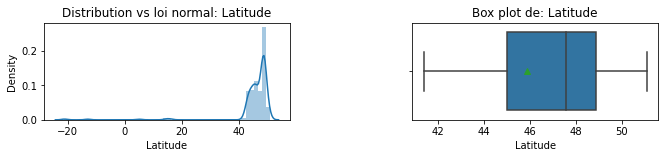

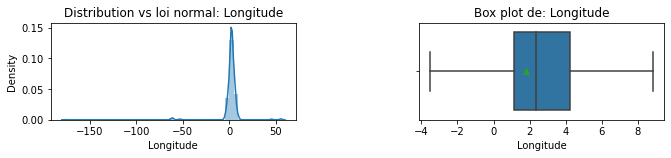

In [50]:
plt.rcParams["figure.figsize"] = [11,5]
grid = plt.GridSpec(2,2 , wspace=0.5, hspace=0.8)
for col in data_selct.select_dtypes( include = ['float', 'int']).columns.to_list():
    plt.figure()
    ax0 = plt.subplot(grid[0, 0:1])
    ax0= sns.distplot(data_selct[col], kde =True)
    ax0.set_title("Distribution vs loi normal: {}" .format(col), fontsize = 12)
    ax1 = plt.subplot(grid[0, 1:])
    ax1= sns.boxplot(data = data_selct,  x = data_selct[col], showfliers =False, showmeans =True)
    ax1.set_title("Box plot de: {}" .format(col), fontsize = 12)



# Commentaire :

La plupart des activités tourne autour de la restauration et l'évaluation globale est **satisfaisant**. Le 15 iéme arrondissement de Paris est plus concerné par ce controle sanitaire.

Les **distribution non Gaussienne** des coordonnées géographiques nous renseignent sur l'etendu de la **zone de contrôle** autrement, une grande partie du territoire francçais ont été concernée par ce contrôle.

## <font color="red" id="section_6" > 6. TARGET: Synthese_eval_sanit

In [51]:
data_selct['Synthese_eval_sanit'].value_counts()

Satisfaisant                     18467
Très satisfaisant                13711
A améliorer                       1864
A corriger de manière urgente      135
Name: Synthese_eval_sanit, dtype: int64

<AxesSubplot:>

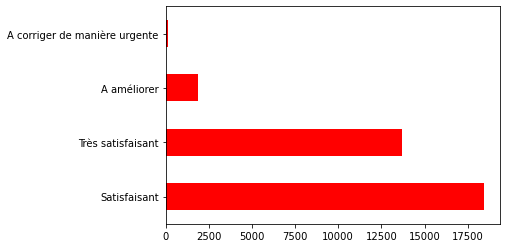

In [52]:
data_selct['Synthese_eval_sanit'].value_counts().plot.barh(color = 'red', figsize =(6, 4))

# Commentaire: 
On premier constat constitue à affirmer que les cibles sont déséquilibrés. On va falloir donc les gonfler artificiellement pendent la formation.
Nous allons dés à présent regrouper les cibles les moins  volumineux en une seule variable appelé: **Urgent_Améliorer**.

In [53]:
for mod in data_selct['Synthese_eval_sanit'].unique():
    if (mod == 'A améliorer' ) | (mod == 'A corriger de manière urgente' ) :
        data_selct.loc[data_selct['Synthese_eval_sanit']==mod, 'Synthese_eval_sanit'] = 'Urgent_Améliorer'

In [54]:
data_selct['Synthese_eval_sanit'].value_counts()

Satisfaisant         18467
Très satisfaisant    13711
Urgent_Améliorer      1999
Name: Synthese_eval_sanit, dtype: int64

<AxesSubplot:>

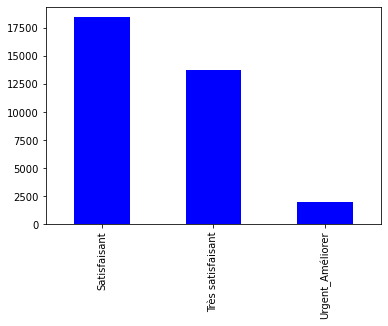

In [55]:
data_selct['Synthese_eval_sanit'].value_counts().plot.bar(color = 'blue', figsize =(6, 4))

## <font color="red" id="section_7" > 7. Features transformation:  Adresse_2_UA
    
**Commentaire**: Dans le but de faciliter la classification; nous allons séparer les différents types adresses en nouvelle variable et encoder en **0** ou **1**.
    
**0**: Le l'établissement( restaurant, alimentation générale, etc) n'est pas situé sur Rue, Avenue, Route, Boulevard, Place, Quai.
    
**1**, sinon.

In [56]:
display(data_selct['Adresse_2_UA'].head(8))
display(data_selct['Adresse_2_UA'].tail(6))

0             29 R DES ETANGS
1                14 AV SOMMER
2              R JEAN BULLANT
5      LIEUDIT LES HAPHLERIES
7           CARRE A LA VIANDE
8              R CLEMENT ADER
14                     CD 909
16    103 AVENUE LAURENT CELY
Name: Adresse_2_UA, dtype: object

34166           Rue Benjamin Constant
34167                 54 RUE DE PARIS
34169               186 RUE DE CRIMEE
34170    2 RUE MAURICE AYRET D ORTAIL
34173           12 RUE CROCE-SPINELLI
34175             av des mots du soir
Name: Adresse_2_UA, dtype: object

In [57]:
def coding_binary(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True) #keys est la valeurs à remplacer par value
    return colCoded

In [58]:
data_selct['Adresse_2_UA'] = data_selct['Adresse_2_UA'].str.lower()
data_selct['Adresse_2_UA'].fillna('nd', inplace = True)
# Rue 
data_selct['Adress_Rue'] = data_selct['Adresse_2_UA'].str.count('rue')  + data_selct['Adresse_2_UA'].str.count('r')
data_selct['Adress_Rue'] = coding_binary(data_selct['Adress_Rue'], {2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1}) 
# Avenue ou AV
data_selct['Adress_Avenue'] = data_selct['Adresse_2_UA'].str.count('avenue') + data_selct['Adresse_2_UA'].str.count('av') 
data_selct['Adress_Avenue'] = coding_binary(data_selct['Adress_Avenue'], {2:1, 3:1}) 
# Chemin ou ch
data_selct['Adress_Chemin'] = data_selct['Adresse_2_UA'].str.count('chemin') + data_selct['Adresse_2_UA'].str.count('ch') 
data_selct['Adress_Chemin'] = coding_binary(data_selct['Adress_Chemin'], {2:1, 3:1}) 
#Place ou pl
data_selct['Adress_Place'] = data_selct['Adresse_2_UA'].str.count('place') + data_selct['Adresse_2_UA'].str.count('pl') 
data_selct['Adress_Place'] = coding_binary(data_selct['Adress_Place'], {2:1, 3:1}) 
#Boulevard ou bd
data_selct['Adress_Boulevard'] = data_selct['Adresse_2_UA'].str.count('boulevard') + data_selct['Adresse_2_UA'].str.count('bd')
data_selct['Adress_Boulevard'] = coding_binary(data_selct['Adress_Boulevard'], {2:1}) 
# Route ou r
data_selct['Adress_Route'] = data_selct['Adresse_2_UA'].str.count('route')
data_selct['Adress_Route'] = coding_binary(data_selct['Adress_Route'], {2:1}) 
#Quai
data_selct['Adress_quai'] = data_selct['Adresse_2_UA'].str.count('quai')
data_selct['Adress_quai'] = coding_binary(data_selct['Adress_quai'], {2:1, 3:1, 4:1})
data_selct.drop('Adresse_2_UA', axis = 1, inplace = True)

In [59]:
data_selct.head(3)

APP_Libelle_etablissement Code_postal  \
0  DE CERGY NEUVILLE (SYND MIXTE D'ETUDE AMENA GE...       95800   
1  CODIPEX (CONSORTIUM EUROPE ECHANG COMMERC INTE...       92160   
2           MUSEE DE LA RENAISSANCE CHATEAU D'ECOUEN       95440   

  Libelle_commune Synthese_eval_sanit filtre_activite   Latitude  Longitude  \
0           CERGY    Urgent_Améliorer          Autres  45.883682   1.814627   
1          ANTONY   Très satisfaisant          Autres  48.732041   2.305533   
2          ECOUEN        Satisfaisant          Autres  49.017271   2.380653   

   Adress_Rue  Adress_Avenue  Adress_Chemin  Adress_Place  Adress_Boulevard  \
0           1              0              0             0                 0   
1           1              1              0             0                 0   
2           1              0              0             0                 0   

   Adress_Route  Adress_quai  
0             0            0  
1             0            0  
2             0            0

## <font color="red" id="section_8" > 8. Exploration de données

In [60]:
data_selct.head(2)

APP_Libelle_etablissement Code_postal  \
0  DE CERGY NEUVILLE (SYND MIXTE D'ETUDE AMENA GE...       95800   
1  CODIPEX (CONSORTIUM EUROPE ECHANG COMMERC INTE...       92160   

  Libelle_commune Synthese_eval_sanit filtre_activite   Latitude  Longitude  \
0           CERGY    Urgent_Améliorer          Autres  45.883682   1.814627   
1          ANTONY   Très satisfaisant          Autres  48.732041   2.305533   

   Adress_Rue  Adress_Avenue  Adress_Chemin  Adress_Place  Adress_Boulevard  \
0           1              0              0             0                 0   
1           1              1              0             0                 0   

   Adress_Route  Adress_quai  
0             0            0  
1             0            0

### <font color="red" id="section_8_1" > 8.1 Synthese_eval_sanit & filtre_activite

**Commentaire**: Dans cette partie nous allons analyser les données et les interpréter.

In [61]:
for mod in data_selct.filtre_activite.unique():
    print("Le nombre de modalités de",mod,",est : ",len((data_selct[data_selct["filtre_activite"]==mod])))
    print("-"*60)

Le nombre de modalités de  Autres ,est :  2910
------------------------------------------------------------
Le nombre de modalités de  Produits de la mer et d'eau douce ,est :  1820
------------------------------------------------------------
Le nombre de modalités de  Lait et produits laitiers ,est :  1764
------------------------------------------------------------
Le nombre de modalités de  Abattoirs ,est :  1175
------------------------------------------------------------
Le nombre de modalités de  Viandes et produits carnés ,est :  2620
------------------------------------------------------------
Le nombre de modalités de  Transport et entreposage de denrées alimentaires ,est :  817
------------------------------------------------------------
Le nombre de modalités de  Œufs et ovoproduits ,est :  439
------------------------------------------------------------
Le nombre de modalités de Alimentation générale ,est :  212
------------------------------------------------------------
L

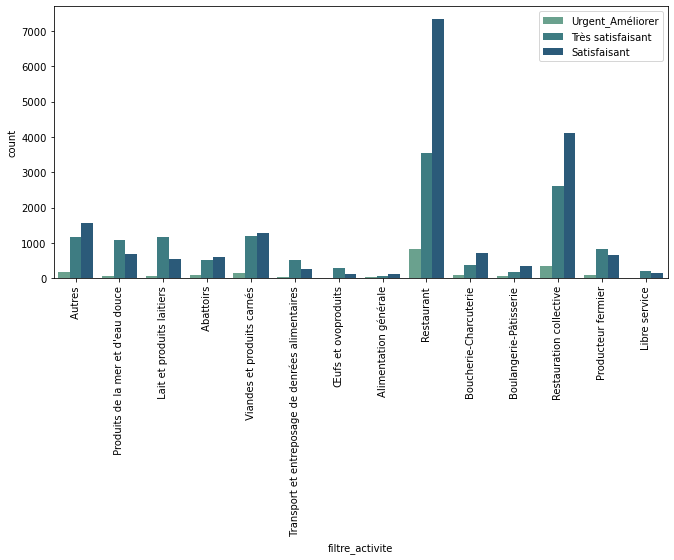

In [62]:
sns.countplot(data =data_selct, x = data_selct['filtre_activite'], 
            hue ='Synthese_eval_sanit', palette="crest")
plt.legend(loc ='best')
plt.xticks(rotation = 90)
plt.show()

# Commentaire : 
Les activités liées aux **restaurants** et **restauation collective** sont plus réparties sur l'ensemmble du jeu de données contrairement à **Libre service** et **alimentation** qui subissaient moins de contrôle sanitaire.

### <font color="red" id="section_8_2" > 8.2 Synthese_eval_sanit & Adresse
    
Regardons les relations entre **synthese_eval_sanitaire** et les **adresse___** histoire de dimensioner le niveau de complétude de chaque cible afn d'augmenter le niveau de classifier dans le notebook suivant.

In [63]:
data_selct.head(2)

APP_Libelle_etablissement Code_postal  \
0  DE CERGY NEUVILLE (SYND MIXTE D'ETUDE AMENA GE...       95800   
1  CODIPEX (CONSORTIUM EUROPE ECHANG COMMERC INTE...       92160   

  Libelle_commune Synthese_eval_sanit filtre_activite   Latitude  Longitude  \
0           CERGY    Urgent_Améliorer          Autres  45.883682   1.814627   
1          ANTONY   Très satisfaisant          Autres  48.732041   2.305533   

   Adress_Rue  Adress_Avenue  Adress_Chemin  Adress_Place  Adress_Boulevard  \
0           1              0              0             0                 0   
1           1              1              0             0                 0   

   Adress_Route  Adress_quai  
0             0            0  
1             0            0

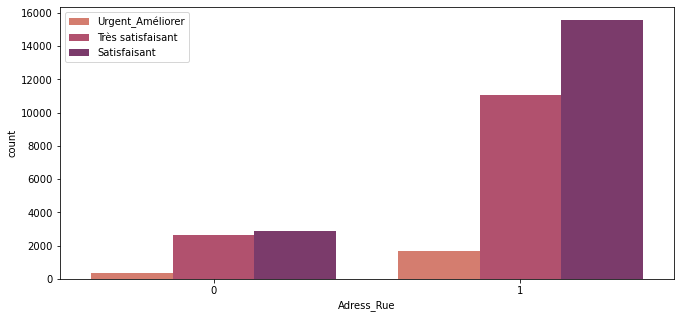

In [64]:
sns.countplot(data =data_selct,  x ="Adress_Rue", hue = 'Synthese_eval_sanit', palette = 'flare' )
plt.legend(loc = 'best')
plt.show()

# Commentaire: 
Globalement, il y'a moins d'établissements situés sur une rue  avec un contrôle sanitaire **Satisfaisant** ou **Très satisfaisant**.

### <font color="red" id="section_8_3" > 8.3 Coisement de données: Synthese_eval_sanit & Adresse AVENUE VS ROUTE

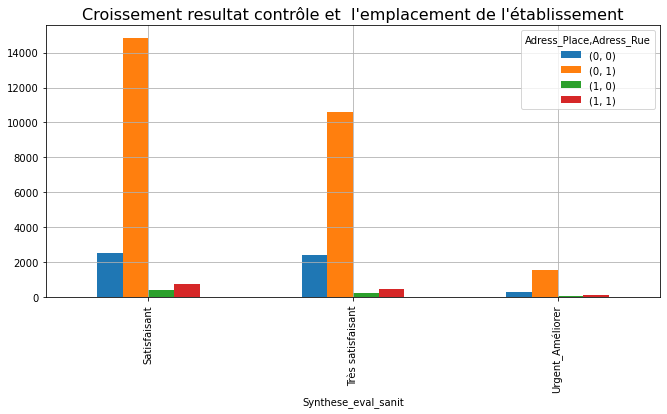

In [65]:
pd.crosstab(data_selct.Synthese_eval_sanit, [data_selct.Adress_Place, data_selct.Adress_Rue]).plot.bar()
plt.title("Croissement resultat contrôle et  l'emplacement de l'établissement", fontsize = 16)
plt.grid()
plt.show()

# Commentaire: 
Dans ce croisement de données, on juste en déduire que les établissements avec un **trés bon** ou **bon** contrôle sanitaire sont plutôt situés sur une rue qu'une place en guise de comparaison.

## <font color="red" id="section_8_4" > 8.4 Type d'adresse avec un meilleur contrôle sanitaire.
    
Dans cette dernière section, on va chercher le type d'adresse où est situé l'établissement avec un meilleur contôle sanitaire.

In [66]:
data_selct.head(2)

APP_Libelle_etablissement Code_postal  \
0  DE CERGY NEUVILLE (SYND MIXTE D'ETUDE AMENA GE...       95800   
1  CODIPEX (CONSORTIUM EUROPE ECHANG COMMERC INTE...       92160   

  Libelle_commune Synthese_eval_sanit filtre_activite   Latitude  Longitude  \
0           CERGY    Urgent_Améliorer          Autres  45.883682   1.814627   
1          ANTONY   Très satisfaisant          Autres  48.732041   2.305533   

   Adress_Rue  Adress_Avenue  Adress_Chemin  Adress_Place  Adress_Boulevard  \
0           1              0              0             0                 0   
1           1              1              0             0                 0   

   Adress_Route  Adress_quai  
0             0            0  
1             0            0

In [67]:
data_selct.groupby("Synthese_eval_sanit")["Adress_Rue", "Adress_Avenue", 'Adress_Chemin',
                      "Adress_Place","Adress_Boulevard","Adress_Route", "Adress_quai"  ].sum()/ data_selct.shape[0]

Adress_Rue  Adress_Avenue  Adress_Chemin  Adress_Place  \
Synthese_eval_sanit                                                           
Satisfaisant           0.455657       0.070515       0.065278      0.033678   
Très satisfaisant      0.323258       0.047195       0.054481      0.020013   
Urgent_Améliorer       0.048980       0.007783       0.006993      0.004477   

                     Adress_Boulevard  Adress_Route  Adress_quai  
Synthese_eval_sanit                                               
Satisfaisant                 0.023144      0.021242     0.004652  
Très satisfaisant            0.012933      0.020043     0.003131  
Urgent_Améliorer             0.002809      0.002750     0.000497

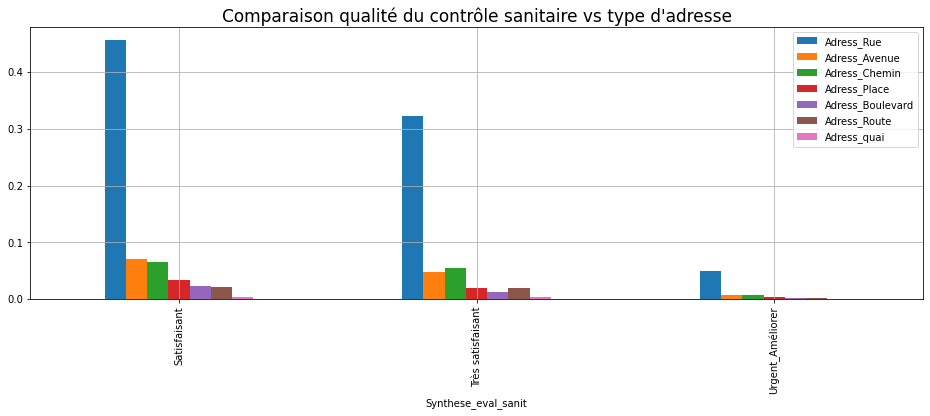

In [68]:
(data_selct.groupby("Synthese_eval_sanit")["Adress_Rue", "Adress_Avenue", 'Adress_Chemin',
 "Adress_Place","Adress_Boulevard","Adress_Route", "Adress_quai"  ].sum()/ data_selct.shape[0]).plot.bar(figsize = (16,5))
plt.title("Comparaison qualité du contrôle sanitaire vs type d'adresse", fontsize =17)
plt.grid()
plt.show()

# Commentaire :

Les résultats de ce contrôle sanitaire nous montre la qualité sanitaire pour l'ensemble des établissement supervisés sont **Satisfaisant** et la plupart d'entre eux se situent sur une Rue plutôt sur une **avenue** par exemple.

## <font color="red" id="section_9" > 9. Localisation des établissement

In [83]:
color_scale = [(0, 'black'), (1,'red')]

fig = px.scatter_mapbox(data_selct, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Libelle_commune", 
                        hover_data=["Libelle_commune"],
                        color_continuous_scale=color_scale,
                        zoom=9, 
                        height=300,
                        width=700,
                       )
                        
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":1,"l":0,"b":0})
fig.show()

## <font color="red" id="section_10" > 10. Enregitrement de fichier
 Nous allons enrégistrer le fichier au format csv en vue d'une modélisation.

In [70]:
data_selct.to_csv("Data_model.csv", index = False)